# Import Libraries

In [490]:
import numpy as np
import pandas as pd
print(np.__version__)
print(pd.__version__)

1.24.3
2.2.2


# Read Data

In [492]:
churn = pd.read_csv("Churn_Modelling.csv")

In [493]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Drop Unnecessary columns

In [495]:
churn.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [496]:
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [497]:
churn.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# Convert categorical columns into numerical columns using one-hot encoding

In [499]:
churn = pd.get_dummies(churn, columns=["Geography", "Gender"], drop_first=True, dtype="int")

In [500]:
churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Separate Input Columns and Output Columns

In [502]:
X = churn.drop(columns=["Exited"]) # Input Columns
y = churn["Exited"].values # Predicted Columns

In [503]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Model Fitting

In [505]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_transform = scaler.fit_transform(X_train)
x_test_transform = scaler.transform(X_test)

# Creating neural network (ANN)

In [507]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [508]:
model = Sequential()

model.add(Dense(11, activation="sigmoid", input_dim=11))
model.add(Dense(11, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid"))

In [509]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 11)                132       
                                                                 
 dense_22 (Dense)            (None, 11)                132       
                                                                 
 dense_23 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [510]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [511]:
history = model.fit(X_train,y_train, batch_size=50, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
128/128 [==============================] - 2s 4ms/step - loss: 0.5206 - accuracy: 0.7934 - val_loss: 0.4968 - val_accuracy: 0.7987
Epoch 2/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7934 - val_loss: 0.4959 - val_accuracy: 0.7987
Epoch 3/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7934 - val_loss: 0.4957 - val_accuracy: 0.7987
Epoch 4/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7934 - val_loss: 0.4952 - val_accuracy: 0.7987
Epoch 5/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7934 - val_loss: 0.4947 - val_accuracy: 0.7987
Epoch 6/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5033 - accuracy: 0.7934 - val_loss: 0.4949 - val_accuracy: 0.7987
Epoch 7/30
128/128 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.7934 - val_loss: 0.4943 - val_accuracy: 0.7987
Epoch 

In [512]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [513]:
y_pred

array([[0.2531209 ],
       [0.16195469],
       [0.16195469],
       ...,
       [0.16195469],
       [0.16195469],
       [0.26625347]], dtype=float32)

In [514]:
y_pred = y_pred.argmax(axis=1)

In [515]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8035

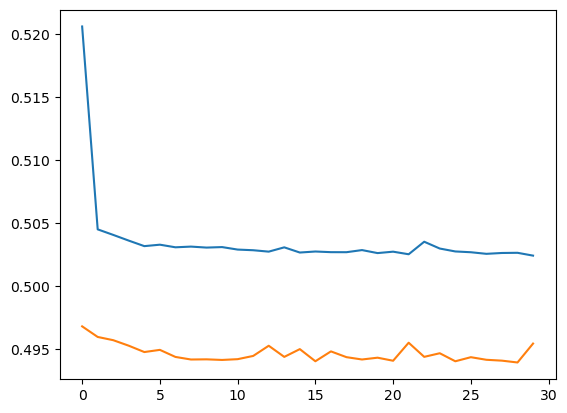

In [516]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

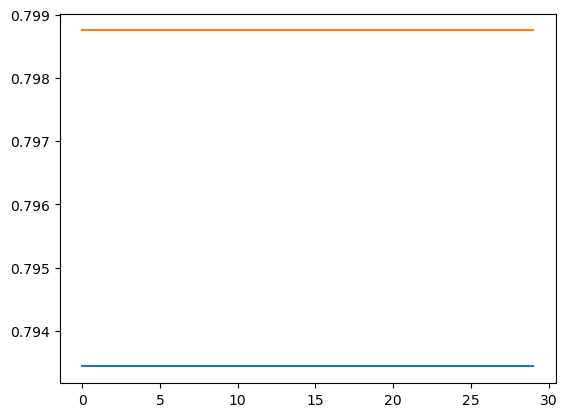

In [517]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])